<a href="https://colab.research.google.com/github/Sem8/deep-learning-udemy-granatyr/blob/main/Libraries_for_Neural_Networks_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries for Neural Networks - TensorFlow (image classification)

## Loading the dataset

In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Class: 5')

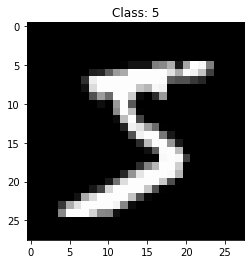

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class: ' + str(y_train[0]))

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [ ]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = X_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train.max()

1.0

In [ ]:
X_train.min()

0.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train = np_utils.to_categorical(y_train)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test = np_utils.to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Neural network (training)

In [ ]:
(784 + 10) / 2

397.0

In [ ]:
# 784 -> 397 -> 397 -> 10
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation = 'relu'))
network.add(Dense(units=397, activation='relu'))
network.add(Dense(units = 10, activation='softmax'))

In [ ]:
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
history = network.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2288 - accuracy: 0.9327
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0834 - accuracy: 0.9743
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0540 - accuracy: 0.9832
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0372 - accuracy: 0.9882
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0301 - accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0224 - accuracy: 0.9925
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0164 - accuracy: 0.9944
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0111 - accuracy: 0.9961

## Neural network (evaluation)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

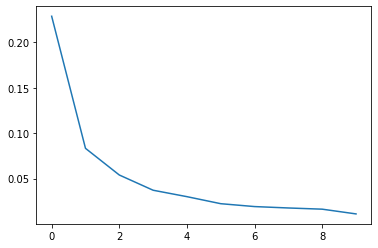

In [ ]:
plt.plot(history.history['loss'])

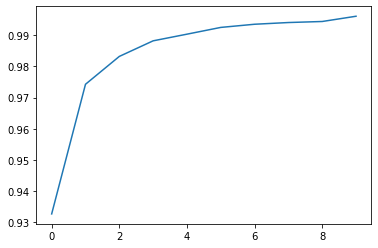

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
accuracy_test = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9768


In [ ]:
predictions = network.predict(X_test)

In [ ]:
predictions[0]

array([9.9170758e-12, 5.5254834e-10, 9.4055119e-10, 1.0163390e-06,
       7.6952344e-13, 7.4091559e-11, 4.6694234e-18, 9.9999845e-01,
       2.9949064e-11, 4.3615546e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

Text(0.5, 1.0, 'Class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

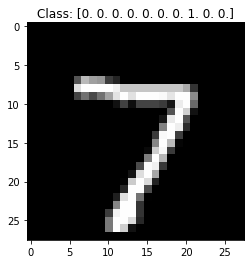

In [ ]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title('Class: ' + str(y_test[0]))